### Load modules libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Load the data

In [56]:
xls = pd.ExcelFile('Data.xlsx')

data = {}
for sheet_name in xls.sheet_names:
    data[sheet_name] = pd.read_excel(xls, sheet_name)

# Perform analysis for each sheet
for sheet_name, df in data.items():
    print("Sheet Name:", sheet_name)
    print("Shape:", df.shape)
    
    # Step 3: Descriptive and summary statistics
    summary_stats = df.head()
    print(summary_stats)

Sheet Name: Convertible bond Data
Shape: (207, 24)
      Bond ISIN Company ISIN  Ticker           Issuer  \
0  US88160RAG65       69568X    TSLA            Tesla   
1  US021369AA17       9211QT    ALTR       Altair Eng   
2  US049164BJ49       29301P  RANPTA     Atlas Air WW   
3  US92336XAA72       9307U8  SSWPTA   Arriver Holdco   
4  US92886TAJ16       902179      VG  Vonage Holdings   

   Amount Issued (USD)/ Proceeds  Issue Price  Number of Issues  Coupon  \
0                     1840000000        100.0        18400000.0   2.000   
1                      230000000        100.0         2300000.0   0.250   
2                      289000000        100.0         2890000.0   1.875   
3                      207000000        100.0         2070000.0   4.000   
4                      345000000        100.0         3450000.0   1.750   

    Maturity  No of years until final maturity  ... Country of Issue  \
0 2024-05-15                          5.022810  ...    United States   
1 2024-06-0

In [57]:
# Descriptive statistics for total assets, issue size, Altman's Z score, and market-to-book ratio
variables_of_interest = ["Total Assets Prior to Issue (USD)", "Issue Size", "Altman Z Score", "Market to Book Prior to Issue (USD)"]

for variable in variables_of_interest:
    print("Descriptive Statistics for", variable)
    print(data["Firm Data"][variable].describe())
    print()


Descriptive Statistics for Total Assets Prior to Issue (USD)
count    1.960000e+02
mean     1.126371e+07
std      3.694185e+07
min      1.089870e+05
25%      5.670785e+05
50%      1.478326e+06
75%      4.457372e+06
max      2.456090e+08
Name: Total Assets Prior to Issue (USD), dtype: float64

Descriptive Statistics for Issue Size
count    1.950000e+02
mean     5.071033e+08
std      4.629155e+08
min      3.784875e+07
25%      2.012500e+08
50%      3.450000e+08
75%      6.633820e+08
max      3.000000e+09
Name: Issue Size, dtype: float64

Descriptive Statistics for Altman Z Score
count    196.000000
mean       0.730181
std        0.722560
min       -0.023878
25%        0.354975
50%        0.558901
75%        0.880198
max        7.386298
Name: Altman Z Score, dtype: float64

Descriptive Statistics for Market to Book Prior to Issue (USD)
count    196.000000
mean       4.326888
std       26.024605
min     -164.890000
25%        1.455000
50%        3.690000
75%        8.157500
max      171.60

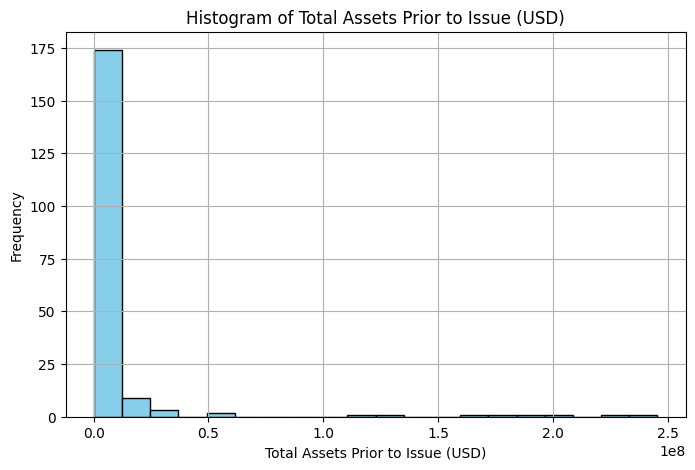

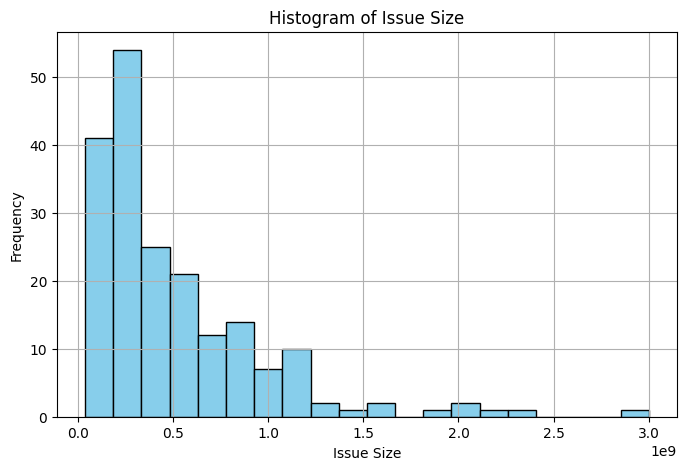

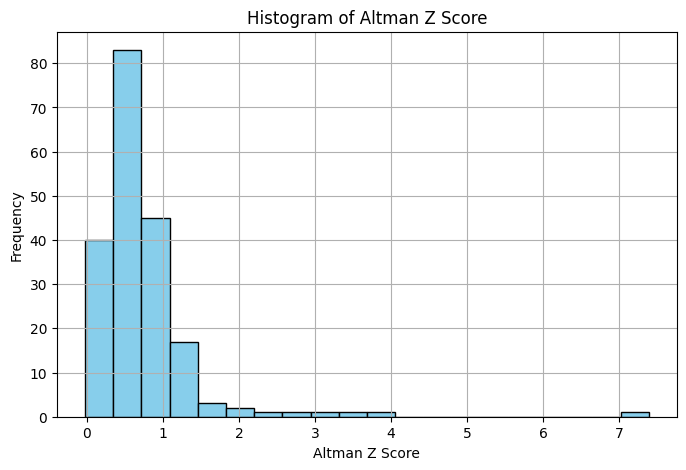

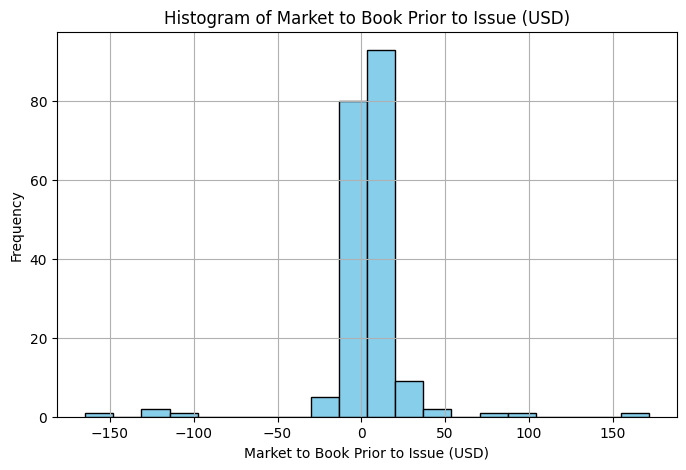

In [58]:
import matplotlib.pyplot as plt

# Univariate analysis: histograms for continuous variables
for variable in variables_of_interest:
    plt.figure(figsize=(8, 5))
    plt.hist(data["Firm Data"][variable], bins=20, color='skyblue', edgecolor='black')
    plt.title("Histogram of " + variable)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [59]:
import statsmodels.api as sm

# Define independent variables and dependent variable
X = data["Firm Data"][["Total Assets Prior to Issue (USD)", "Issue Size", "Altman Z Score", "Market to Book Prior to Issue (USD)"]]
# Drop rows with NaN or inf values in the "Placement Type" column
data["Firm Data"] = data["Firm Data"][~data["Firm Data"]["Placement Type"].isna() & ~data["Firm Data"]["Placement Type"].isin([np.inf, -np.inf])]

# Convert "Placement Type" column to integers
y = data["Firm Data"]["Placement Type"].astype(int)


# Identify rows with non-finite values in the exog variables
rows_with_nans = np.isnan(X).any(axis=1) | np.isinf(X).any(axis=1)

# Remove rows with non-finite values
X_cleaned = X[~rows_with_nans]
y_cleaned = y[~rows_with_nans]

# Fit logistic regression model with cleaned data
logit_model = sm.Logit(y_cleaned, X_cleaned)
result = logit_model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.500178
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Placement Type   No. Observations:                  195
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Feb 2024   Pseudo R-squ.:                -0.01413
Time:                        11:28:05   Log-Likelihood:                -97.535
converged:                       True   LL-Null:                       -96.176
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Total Assets Prior to Issue (USD)    3.126e-10   4.88e-09 

### Assess model  performance using confusion matrix and ROC curve

In [60]:
import statsmodels.api as sm

# Define independent variables and dependent variable
X = data["Firm Data"][["Total Assets Prior to Issue (USD)", "Issue Size", "Altman Z Score", "Market to Book Prior to Issue (USD)"]]
y = data["Firm Data"]["Placement Type"]

# Add intercept term
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the logistic regression model
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.486423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Placement Type   No. Observations:                  195
Model:                          Logit   Df Residuals:                      190
Method:                           MLE   Df Model:                            4
Date:                Sun, 18 Feb 2024   Pseudo R-squ.:                 0.01376
Time:                        11:28:05   Log-Likelihood:                -94.852
converged:                       True   LL-Null:                       -96.176
Covariance Type:            nonrobust   LLR p-value:                    0.6185
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.9213      0.387 

### calculate the AIC and BIC values

In [61]:
import numpy as np

# Log-likelihood values for the models
log_likelihood_current = -94.852
log_likelihood_previous = -97.535

# Number of parameters for each model
num_params_current = 5  # Including the intercept
num_params_previous = 4  # Including the intercept

# Number of observations
n = 195

# Calculate AIC for the current model
aic_current = -2 * log_likelihood_current + 2 * num_params_current

# Calculate BIC for the current model
bic_current = -2 * log_likelihood_current + num_params_current * np.log(n)

# Calculate AIC for the previous model
aic_previous = -2 * log_likelihood_previous + 2 * num_params_previous

# Calculate BIC for the previous model
bic_previous = -2 * log_likelihood_previous + num_params_previous * np.log(n)

print("AIC for current model:", aic_current)
print("BIC for current model:", bic_current)
print("AIC for previous model:", aic_previous)
print("BIC for previous model:", bic_previous)


AIC for current model: 199.704
BIC for current model: 216.06899779281875
AIC for previous model: 203.07
BIC for previous model: 216.16199823425498


### Stochastic Gradient Descent (SGD) - Model 

In [62]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

# Train the model
sgd_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = sgd_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


### Model comparison 

In [63]:
# Extracting the intercept from the logistic regression results
logit_intercept = result.params[0]

# Using the coefficients and intercept to calculate the predicted probabilities for logistic regression
logit_probs = 1 / (1 + np.exp(-(np.dot(X_test_scaled, logit_coefs) + logit_intercept)))

# Converting probabilities to binary predictions for logistic regression
logit_pred = (logit_probs >= 0.5).astype(int)

# Calculating accuracy for logistic regression
logit_accuracy = accuracy_score(y_test, logit_pred)

# Printing the accuracy of both models
print("Logistic Regression Accuracy:", logit_accuracy)
print("SGDClassifier Accuracy:", accuracy)


Logistic Regression Accuracy: 0.8205128205128205
SGDClassifier Accuracy: 0.6666666666666666


/tmp/ipykernel_94736/1329026504.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logit_intercept = result.params[0]


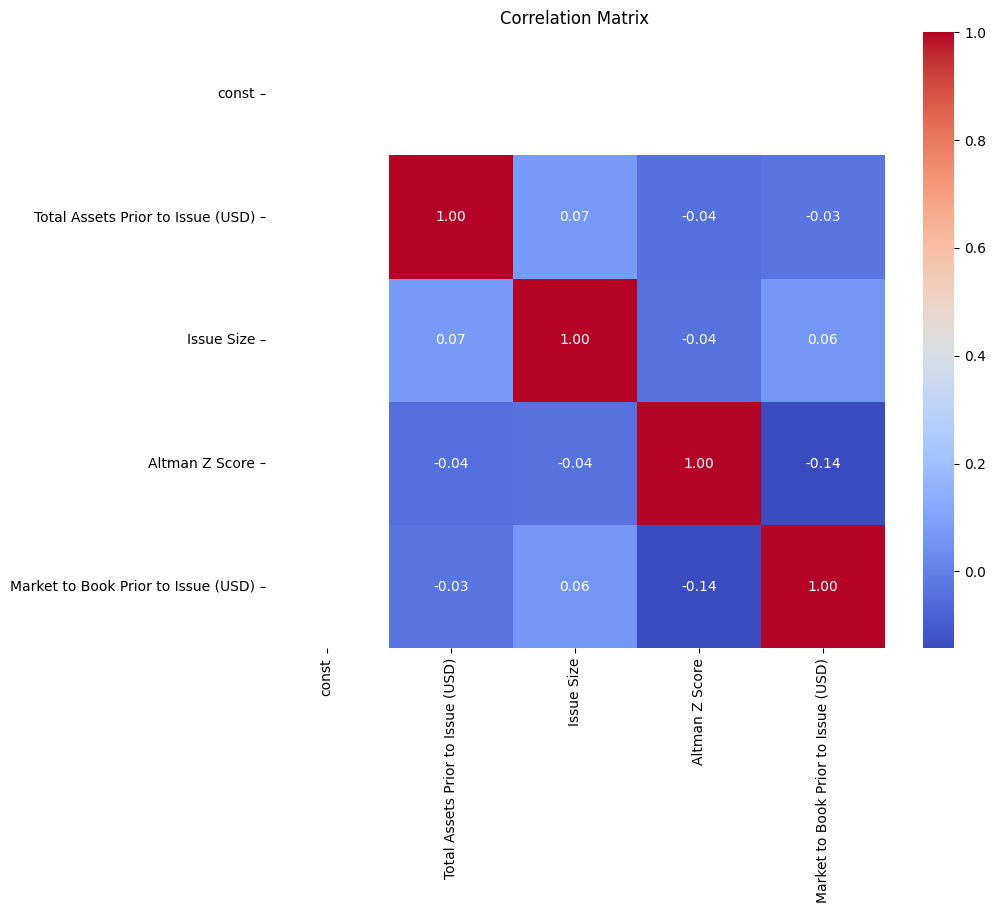

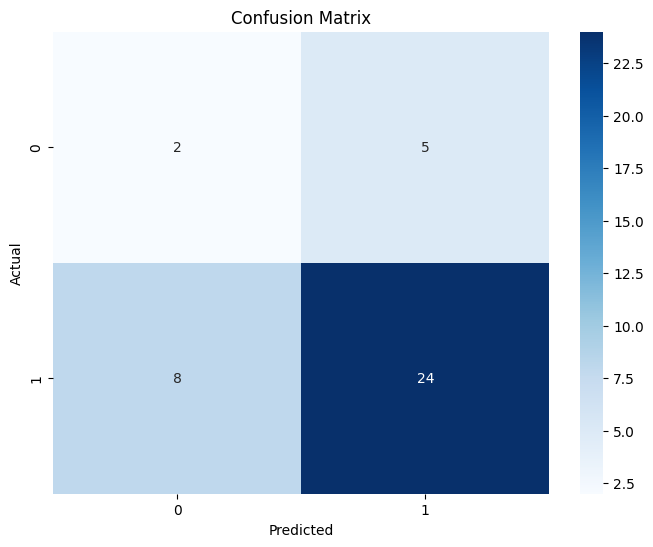

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix



# Correlation Matrix
def plot_correlation_matrix(data):
    corr = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Call the functions with appropriate data
plot_correlation_matrix(X_train)

plot_confusion_matrix(y_test, y_pred)


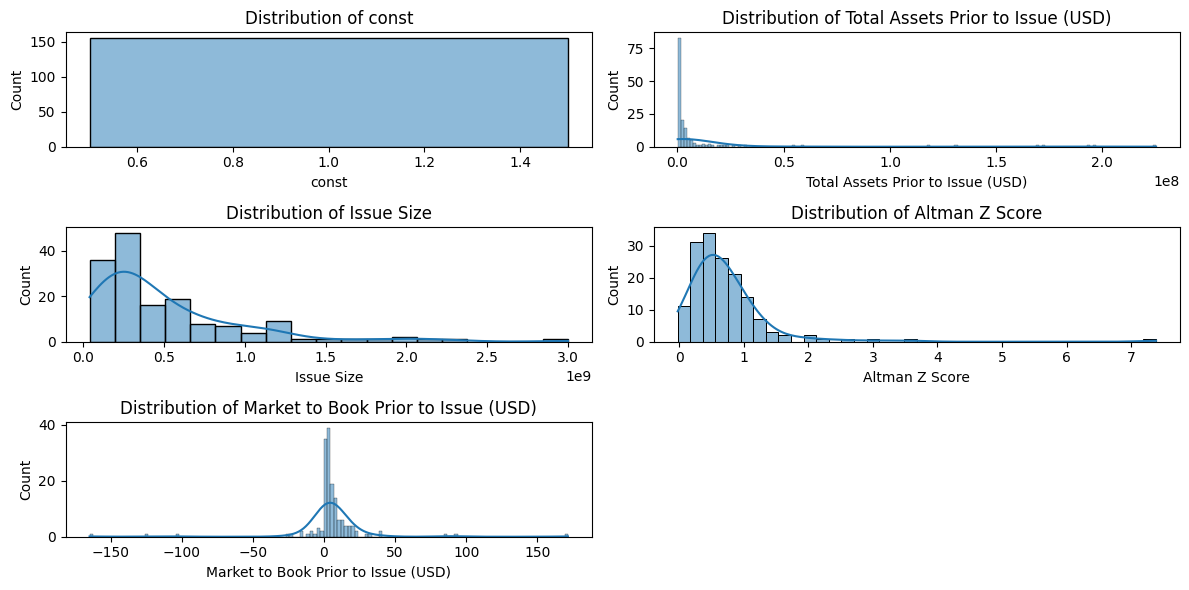

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distribution(data):
    num_features = len(data.columns)
    num_rows = (num_features + 1) // 2
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(data.columns):
        plt.subplot(num_rows, 2, i+1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Call the function with appropriate data
# For example:
plot_feature_distribution(X_train)
